In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('FakeNewsNet.csv')
df1.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [3]:
df1['title'][2]

"Sophia Bush Sends Sweet Birthday Message to 'One Tree Hill' Co-Star Hilarie Burton: 'Breyton 4eva'"

In [4]:
df1.shape

(23196, 5)

In [5]:
df1 = df1[['title','real']]

In [6]:
df1['real'].value_counts()

real
1    17441
0     5755
Name: count, dtype: int64

In [7]:
real = df1[df1['real'] == 1].sample(n= 6000,ignore_index=True)
fake = df1[df1['real'] == 0]

In [8]:
df = pd.concat([real,fake],ignore_index= True)

<Axes: xlabel='real', ylabel='count'>

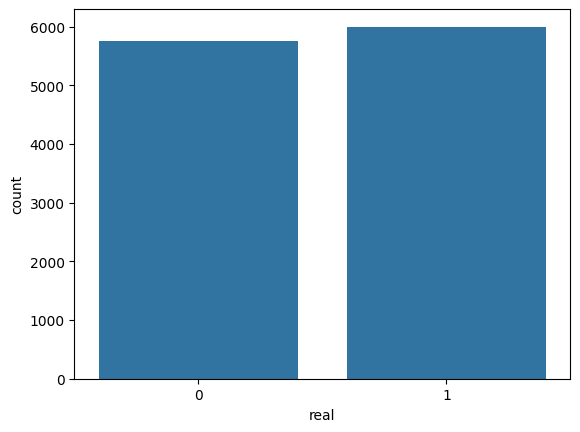

In [9]:
sns.countplot(x = df['real'])

In [10]:
df.shape

(11755, 2)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
import nltk

In [13]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y.copy()
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y.copy()
    y.clear()
    
    for i in text:
        y.append(PorterStemmer().stem(i))
        
    return ' '.join(y)

In [14]:
import string

nltk.download('punkt')
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sandh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sandh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [15]:
df['title']=df['title'].apply(transform_text)

In [16]:
x = df['title'].values
y = df['real'].values

# vectorization

In [17]:
vectorizer1 = TfidfVectorizer(ngram_range =(1, 2), max_features =  10000)
vectorizer1.fit(x)
x_tf = vectorizer1.transform(x)

In [18]:
vectorizer2 = CountVectorizer(ngram_range= (1,2))
vectorizer2.fit(x)
x_bow = vectorizer2.transform(x)

In [19]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split( x_bow, y, test_size=0.20,stratify=y, random_state=42)


In [20]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split( x_tf, y, test_size=0.20,stratify=y, random_state=42)

tfidf

In [21]:
model_lr = LogisticRegression(solver='saga', class_weight='balanced', max_iter=1000)
model_lr.fit(X_train_tf,y_train_tf)
pred_lr = model_lr.predict(X_test_tf)
print('Accuracy Score:', accuracy_score(y_test_tf,pred_lr))
print('Classification:\n', classification_report(y_test_tf,pred_lr))

Accuracy Score: 0.7690241718889884
Classification:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1065
           1       0.76      0.81      0.79      1169

    accuracy                           0.77      2234
   macro avg       0.77      0.77      0.77      2234
weighted avg       0.77      0.77      0.77      2234



bow

In [22]:
model_lr_bow = LogisticRegression(solver='saga', class_weight='balanced')
model_lr_bow.fit(X_train_bow,y_train_bow)
pred_lr_bow = model_lr_bow.predict(X_test_bow)
print('Accuracy Score:', accuracy_score(y_test_bow,pred_lr_bow))
print('Classification:\n', classification_report(y_test_bow,pred_lr_bow))
print('Cnfusion matrix:\n', confusion_matrix(y_test_bow,pred_lr_bow))

Accuracy Score: 0.7641002685765443
Classification:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1065
           1       0.77      0.79      0.78      1169

    accuracy                           0.76      2234
   macro avg       0.76      0.76      0.76      2234
weighted avg       0.76      0.76      0.76      2234

Cnfusion matrix:
 [[783 282]
 [245 924]]


In [23]:
import pickle
pickle.dump(vectorizer2,open('vectorizer.pkl', 'wb'))
pickle.dump(model_lr_bow,open('model.pkl', 'wb'))